# Car Evaluation Dataset 

In [78]:
#load EDA PKgs
import pandas as pd
import numpy as np

In [79]:
#load Data Visualization Pkg
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
#load Sickit learn  PKgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [81]:
#for nurual network (multilayerperception)
from sklearn.neural_network import MLPClassifier

In [82]:
#define the coloumns names 
col_names = [ 'buying','maint','doors','persons','lug_boot','safety','class']

In [83]:
#load dataset from my computer
df = pd.read_csv("desktop/car.data",names=col_names)

In [84]:
# Display the information about the dataset 
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [85]:
# describe the sum of the dataset
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [86]:
#shape of the dataset ( rows, coloumns )
df.shape

(1728, 7)

In [87]:
#check for missing values as described in the table in the websites no values missing 
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [88]:
#check for value counts
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

<AxesSubplot:>

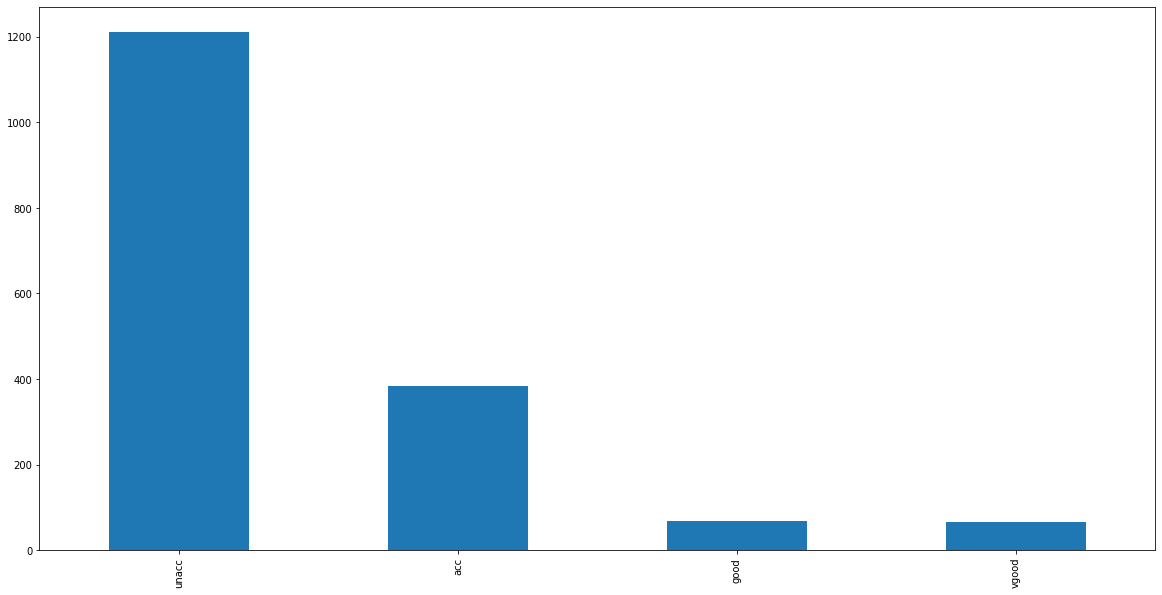

In [89]:
# describe the value counts as a graph 
df['class'].value_counts().plot(kind='bar',figsize=(20,10))

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

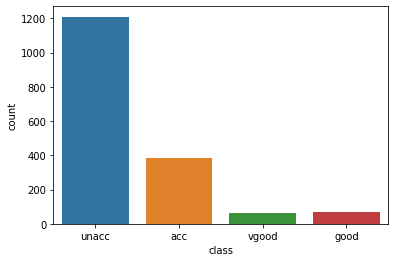

In [90]:
# use seaborn to also visualize the values count 
sns.countplot(df['class'])

In [91]:
# define the columns we have 
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [92]:
#data types
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [93]:
#functions
buying_label = {ni: n for n,ni in enumerate(set(df['buying']))}
maint_label = {ni: n for n,ni in enumerate(set(df['maint']))}
doors_label = {ni: n for n,ni in enumerate(set(df['doors']))}
persons_label = {ni: n for n,ni in enumerate(set(df['persons']))}
lug_boot_label = {ni: n for n,ni in enumerate(set(df['lug_boot']))}
safety_label = {ni: n for n,ni in enumerate(set(df['safety']))}
class_label = {ni: n for n,ni in enumerate(set(df['class']))}

In [94]:
#Testing the label 
buying_label

{'vhigh': 0, 'low': 1, 'med': 2, 'high': 3}

In [95]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [96]:
maint_label

{'vhigh': 0, 'low': 1, 'med': 2, 'high': 3}

In [97]:
#display the whole labels we got 
print('buying_label ={}'.format(buying_label))
print('maint_label ={}'.format(maint_label))
print('doors_label ={}'.format(doors_label))
print('persons_label ={}'.format(persons_label))
print('lug_boot_label ={}'.format(lug_boot_label))
print('safety_label ={}'.format(safety_label))
print('class_label ={}'.format(class_label))

buying_label ={'vhigh': 0, 'low': 1, 'med': 2, 'high': 3}
maint_label ={'vhigh': 0, 'low': 1, 'med': 2, 'high': 3}
doors_label ={'4': 0, '3': 1, '2': 2, '5more': 3}
persons_label ={'4': 0, 'more': 1, '2': 2}
lug_boot_label ={'med': 0, 'big': 1, 'small': 2}
safety_label ={'low': 0, 'med': 1, 'high': 2}
class_label ={'vgood': 0, 'unacc': 1, 'acc': 2, 'good': 3}


In [98]:
df1 = df

In [99]:
df1.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [100]:
# Encoding the data by using map
df1['buying'] = df1['buying'].map(buying_label)

In [101]:
df1['maint'] = df1['maint'].map(maint_label)
df1['doors'] = df1['doors'].map(doors_label)

In [102]:
df1['persons'] = df1['persons'].map(persons_label)
df1['lug_boot'] = df1['lug_boot'].map(lug_boot_label)

In [103]:
df1['safety'] = df1['safety'].map(safety_label)
df1['class'] = df1['class'].map(class_label)

In [104]:
df1.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,2,2,2,0,1
1,0,0,2,2,2,1,1
2,0,0,2,2,2,2,1
3,0,0,2,2,0,0,1
4,0,0,2,2,0,1,1


In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
# set the librabry to a variable 
lb = LabelEncoder()

In [109]:
df2 = df

In [110]:
for i in df2.columns:
    df2[i]=lb.fit_transform(df2[i])

In [111]:
df2.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,2,2,2,0,1
1,0,0,2,2,2,1,1
2,0,0,2,2,2,2,1
3,0,0,2,2,0,0,1
4,0,0,2,2,0,1,1


In [112]:
# check the datatype for the first one 
# we can see from the result that all are integers 
df1.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class       int64
dtype: object

In [119]:
# check the datatype for the second one 
df2.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class       int64
dtype: object

<AxesSubplot:>

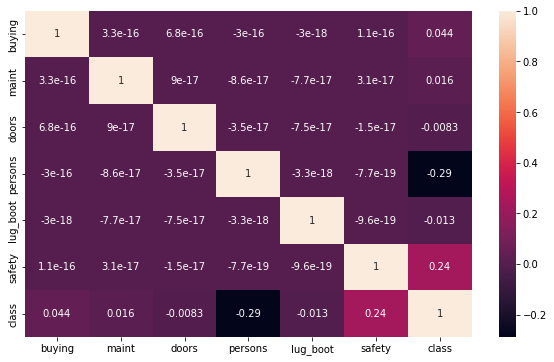

In [113]:
# See the correlation between dateset using seaborn library and heatmap function 
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(),annot=True)

In [114]:
# Check the columns names 
df1.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [115]:
# check more info 
df1.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.264468
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.591455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [124]:
Xfeatures = df1[[ 'buying', 'maint','doors', 'persons', 'lug_boot','safety']]
ylabels= df1['class']

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(Xfeatures, ylabels, test_size = 0.3, random_state=7)

In [129]:
#using Logistic Regression
logit = LogisticRegression()
logit.fit(X_train, Y_train) # to build a realation between them

LogisticRegression()

In [130]:
print("Accuracy Score:", accuracy_score(Y_test, logit.predict(X_test)))

Accuracy Score: 0.7784200385356455


In [131]:
# Using Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

In [132]:
print("Accuracy Score:", accuracy_score(Y_test, nb.predict(X_test)))

Accuracy Score: 0.7341040462427746
